In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("../data/raw/aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
df.describe(include="object")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [6]:
np.round((df.isnull().sum() / df.shape[0]), 2).sort_values(ascending=False)

company_type              0.32
company_size              0.31
gender                    0.24
major_discipline          0.15
enrolled_university       0.02
education_level           0.02
last_new_job              0.02
enrollee_id               0.00
city                      0.00
city_development_index    0.00
relevent_experience       0.00
experience                0.00
training_hours            0.00
target                    0.00
dtype: float64

## Univariate

### Continuous

In [7]:
np.round(df["target"].value_counts(normalize=True), 2)

0.0    0.75
1.0    0.25
Name: target, dtype: float64

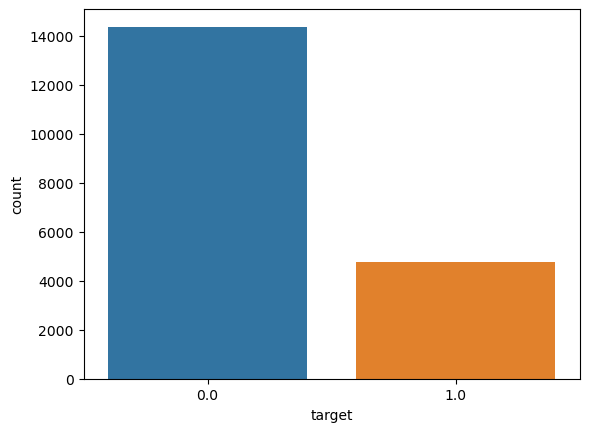

In [8]:
sns.countplot(x="target", data=df);

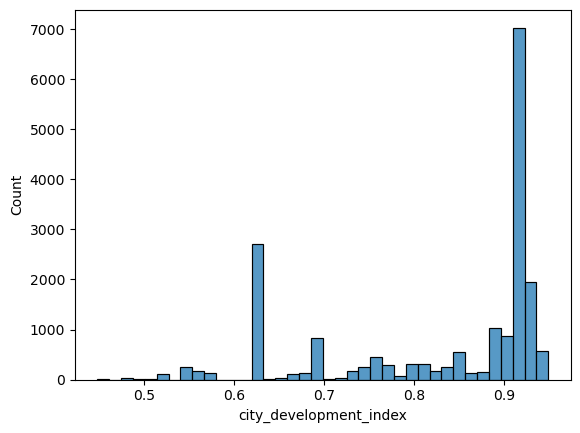

In [9]:
sns.histplot(data=df, x="city_development_index");

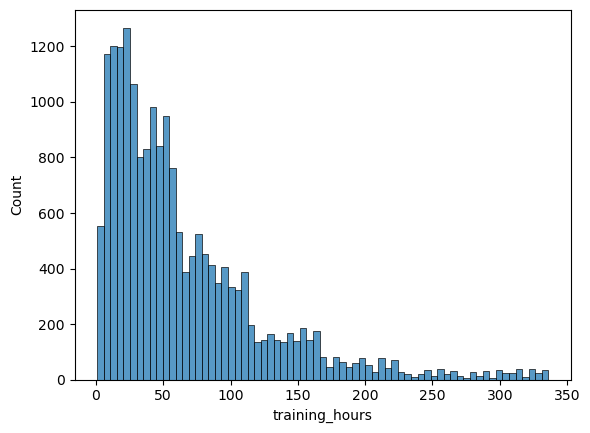

In [10]:
sns.histplot(data=df, x="training_hours");

### Categorical

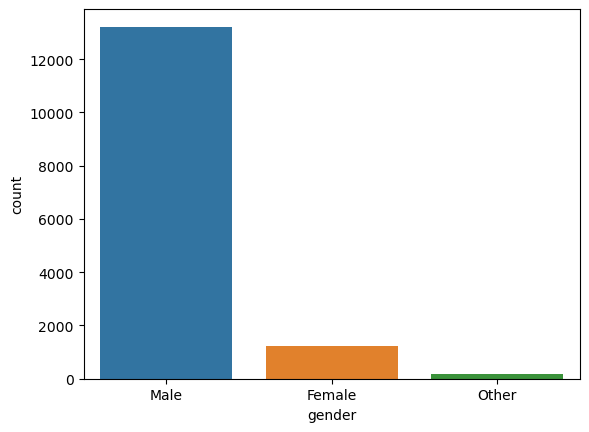

In [14]:
sns.countplot(data=df, x="gender");

Males are dominant in DS applicant

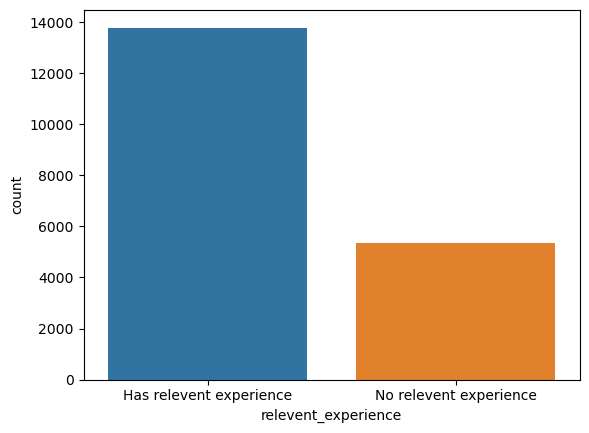

In [13]:
sns.countplot(data=df, x="relevent_experience");

More has relevent previous experience (Experienced vs Entry-level)

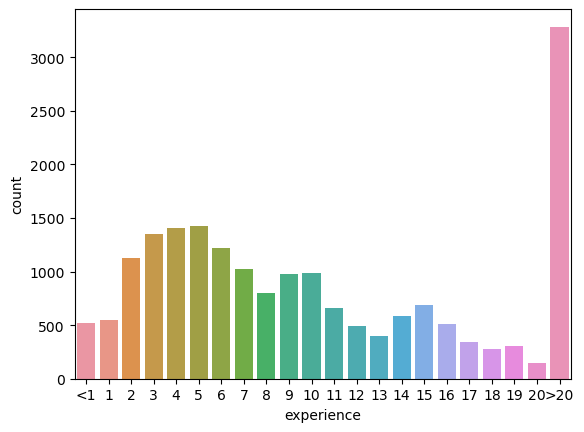

In [13]:
sns.countplot(data=df, x="experience", \
    order=['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']);

Candidates have various number of experience. One interesting find is that many have years of experience larger than 20. This can be converted to numeric type with <1 to 0 and >20 to 25

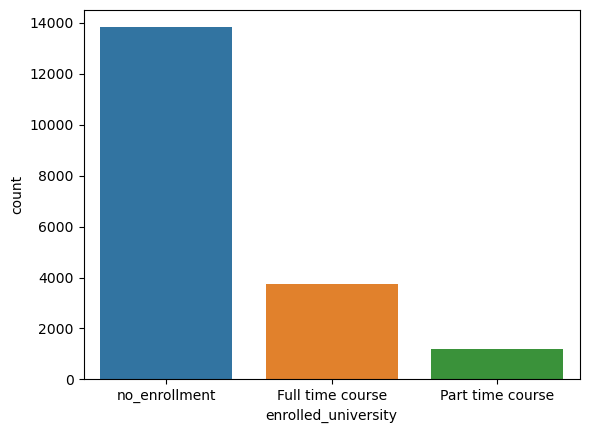

In [15]:
sns.countplot(data=df, x="enrolled_university");

Most did not enroll for the university

<AxesSubplot:xlabel='education_level', ylabel='count'>

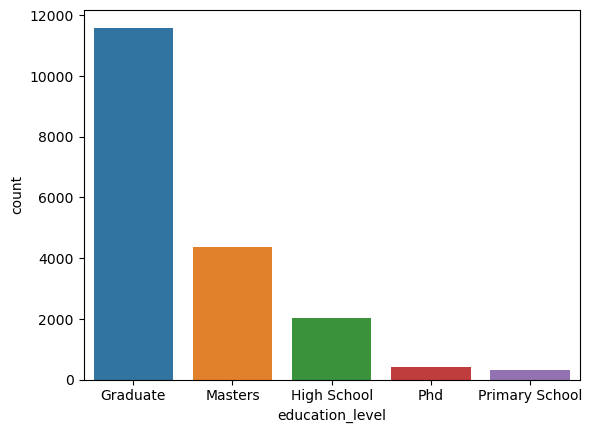

In [15]:
sns.countplot(data=df, x="education_level")

Most has Bachelor's degree

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

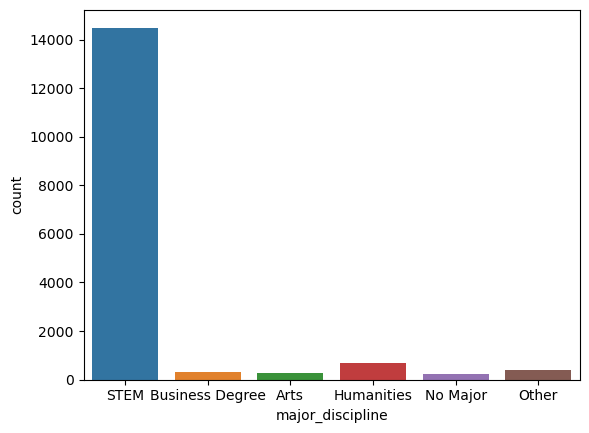

In [16]:
sns.countplot(data=df, x="major_discipline")

STEM majors mostly seek for DS jobs

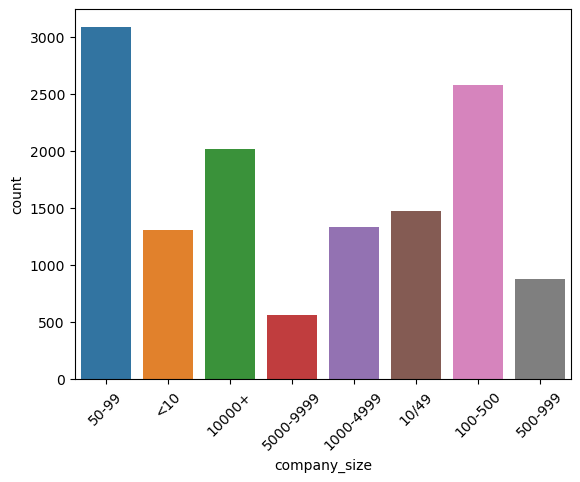

In [17]:
plt.xticks(rotation=45)
sns.countplot(data=df, x="company_size");

This is Ordinal

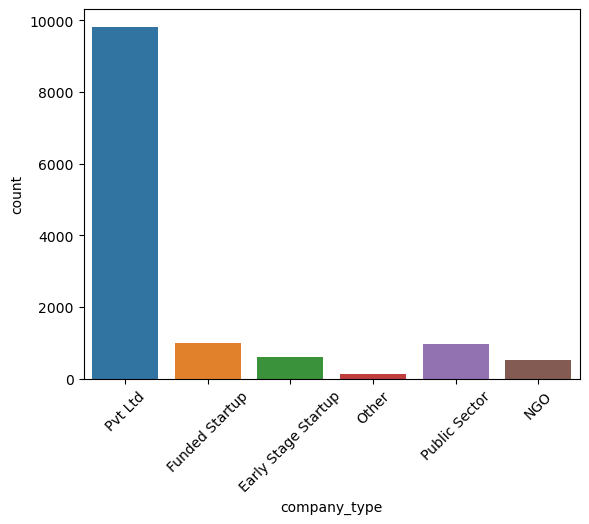

In [18]:
plt.xticks(rotation=45)
sns.countplot(data=df, x="company_type");

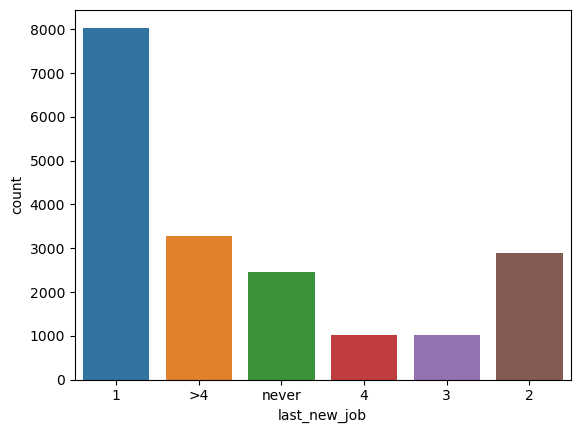

In [19]:
sns.countplot(data=df, x="last_new_job");

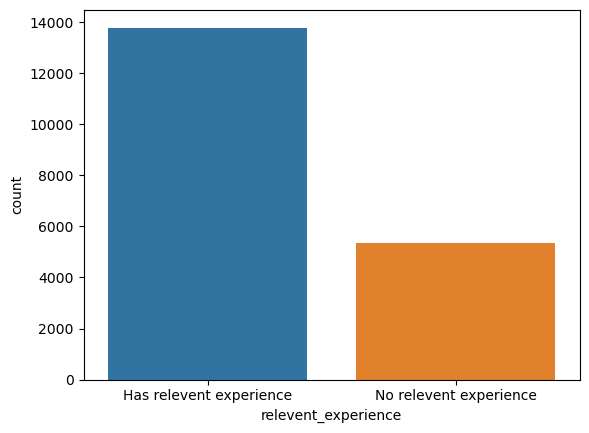

In [108]:
sns.countplot(data=df, x="relevent_experience");

## Bivariate

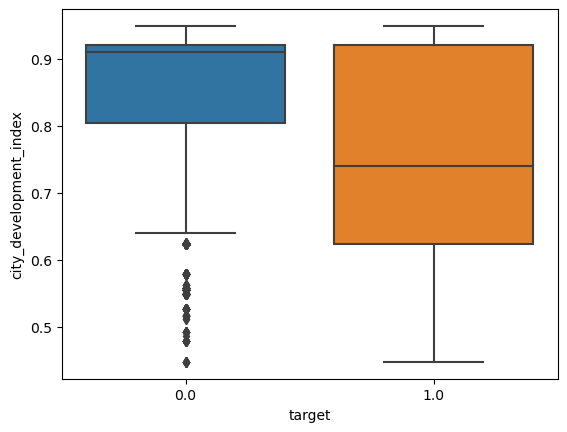

In [20]:
sns.boxplot(data=df, x="target", y="city_development_index");

City development Index for candidates not looking for jobs are left skewed. This is not the case for job seekers

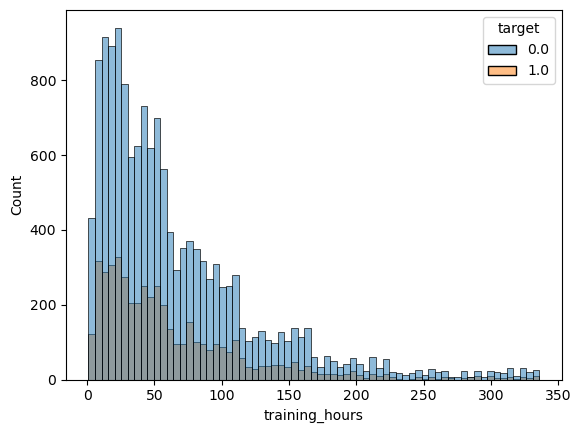

In [35]:
sns.histplot(data=df, x="training_hours", hue="target");

In [ ]:
# Transform experience to numeric type
df["experience"] = np.where(df["experience"] == ">20", "25", np.where(df["experience"] == "<1", "0", df["experience"]))
df["experience"] = pd.to_numeric(df["experience"], errors="raise")

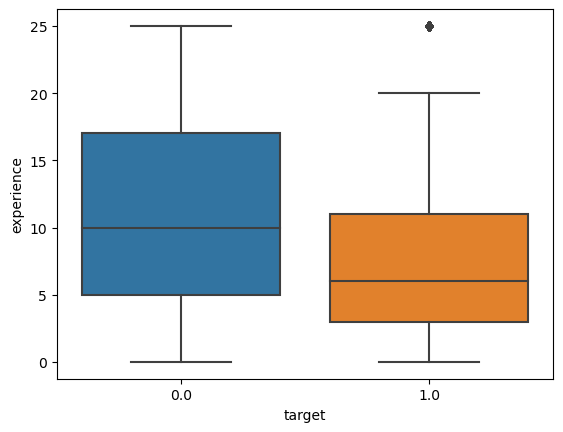

In [33]:
sns.boxplot(data=df, x="target", y="experience");

In [109]:
df.select_dtypes("object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [21]:
# sns.countplot(data=df, x="education_level")
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [110]:
for i in df.select_dtypes("object").columns:
    print(i, df[i].nunique())

city 123
gender 3
relevent_experience 2
enrolled_university 3
education_level 5
major_discipline 6
experience 22
company_size 8
company_type 6
last_new_job 6


## Feature Transformation

In [17]:
np.where(df["experience"] == ">20", "25", np.where(df["experience"] == "<1", "0", df["experience"]))

array(['25', '15', '5', ..., '25', '0', '2'], dtype=object)

In [16]:
np.where(df["experience"] == ">20", "25", np.where(df["experience"] == "<1", "0", df["experience"])).reshape(-1,1).shape

2

In [27]:
df["experience"] = np.where(df["experience"] == ">20", "25", np.where(df["experience"] == "<1", "0", df["experience"]))

In [32]:
df["experience"] = pd.to_numeric(df["experience"], errors="raise")

In [41]:
v = df["experience"].values
v1 = np.where(v == ">20", "25", np.where(v == "<1", "0", v))
v2 = pd.to_numeric(v1, errors="raise")

In [61]:
df["last_new_job"].isnull().sum()

423

In [50]:
v = df["last_new_job"].values
v1 = np.where(v == ">4", "5", np.where(v == "never", "0", v))
v2 = pd.to_numeric(v1, errors="raise")

In [60]:
np.sum(np.isnan(v2))

423

In [20]:
def exp_to_num_trans(experience_arr: np.array) -> np.array:
    """
    function to convert categorical feature experience to numeric type
    """
    exp_trans = np.where(experience_arr == ">20", "25", np.where(experience_arr == "<1", "0", experience_arr))
    exp_to_num = pd.to_numeric(exp_trans, errors="raise").reshape(-1,1)

    return exp_to_num


def lnj_to_num_trans(last_new_job_arr: np.array) -> np.array:
    """
    function to convert categorical feature last new job to numeric type
    """
    exp_trans = np.where(last_new_job_arr == ">4", "5", np.where(last_new_job_arr == "never", "0", last_new_job_arr))
    exp_to_num = pd.to_numeric(exp_trans, errors="raise").reshape(-1,1)

    return exp_to_num

In [21]:
df_num = df[['city_development_index', 'training_hours', 'target', 'experience', 'last_new_job']]

In [22]:
to_numeric_transformer = ColumnTransformer([("experience_transformer", FunctionTransformer(exp_to_num_trans), "experience"),
                                            ("last_new_job_transformer", FunctionTransformer(lnj_to_num_trans), "last_new_job")],
                                            remainder="passthrough")

In [23]:
to_numeric_transformer.fit(df_num)

1
(19158,)


ColumnTransformer(remainder='passthrough',
                  transformers=[('experience_transformer',
                                 FunctionTransformer(func=<function exp_to_num_trans at 0x0000026296307820>),
                                 'experience'),
                                ('last_new_job_transformer',
                                 FunctionTransformer(func=<function lnj_to_num_trans at 0x000002629CEFECA0>),
                                 'last_new_job')])

In [39]:
[i[2] for i in to_numeric_transformer.get_params()["transformers"]]

['experience', 'last_new_job']

In [100]:
pipelr = make_pipeline(to_numeric_transformer, SimpleImputer())

In [105]:
pipelr.fit_transform(df_num)

array([[ 25.   ,   1.   ,   0.92 ,  36.   ,   1.   ],
       [ 15.   ,   5.   ,   0.776,  47.   ,   0.   ],
       [  5.   ,   0.   ,   0.624,  83.   ,   0.   ],
       ...,
       [ 25.   ,   4.   ,   0.92 ,  44.   ,   0.   ],
       [  0.   ,   2.   ,   0.802,  97.   ,   0.   ],
       [  2.   ,   1.   ,   0.855, 127.   ,   0.   ]])

In [5]:
df["company_size"].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
['<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']

In [9]:
df["company_size"].str.replace('/', '-').values

array([nan, '50-99', nan, ..., '50-99', '500-999', nan], dtype=object)

In [14]:
np.unique(np.char.replace(list(df["company_size"].values), '/', '-'))

array(['10-49', '100-500', '1000-4999', '10000+', '50-99', '500-999',
       '5000-9999', '<10', 'nan'], dtype='<U9')

In [8]:
np.char.replace(list(df["company_size"].values), '/', '-')

array(['nan', '50-99', 'nan', ..., '50-99', '500-999', 'nan'], dtype='<U9')

In [42]:
df["company_size"].str.replace('/', '-')

0            NaN
1          50-99
2            NaN
3            NaN
4          50-99
          ...   
19153        NaN
19154        NaN
19155      50-99
19156    500-999
19157        NaN
Name: company_size, Length: 19158, dtype: object

In [15]:
X = np.array(df["company_size"].str.replace('/', '-')).reshape(-1,1)

In [49]:
np.isnan(df["company_size"].str.replace('/', '-')[0])

True

In [28]:
imp = SimpleImputer(strategy="constant", fill_value="Unknown")

In [55]:
# enc = OrdinalEncoder(categories=[['<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']], handle_unknown="use_encoded_value", unknown_value=-1)
enc = OrdinalEncoder(categories=[['<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']], encoded_missing_value=-1)

In [44]:
X2 = imp.fit_transform(X)

In [54]:
np.isnan(X[0][0])

True

In [57]:
X[0][0]

nan

In [56]:
enc.fit_transform(X)

ValueError: Found unknown categories [nan] in column 0 during fit

In [64]:
d1 = {'a':1, 'b':2}

In [65]:
d = {'c': d1}

In [66]:
d

{'c': {'a': 1, 'b': 2}}

In [75]:
list(d.values())[0]

{'a': 1, 'b': 2}